In [1]:
# try 
import json

input_name = "vgg1__14_03_2023_22_26_00"

def synthesize_data(input_name):

    with open("out/durations/"+input_name+".txt") as f:
        duration_lines = [float(line[:-1]) for line in f]
        duration_avg = sum(duration_lines)/len(duration_lines)
        duration_var = sum((i - duration_avg) ** 2 for i in duration_lines) / len(duration_lines)

    with open("out/platforms/"+input_name+".json") as f:
        platform = json.load(f)
        platform = platform.values

    with open("out/schemes/"+input_name+".json") as f:
        scheme_lines = [line[:-1] for line in f]
        loop_order = scheme_lines[0]
        blocking_scheme = scheme_lines[1]

    return duration_avg, duration_var,platform,loop_order[1:21]


In [2]:
# import required module
import os
# assign directory
compiled_directory = 'out/compiled/'
durations_directory = 'out/durations/'
platforms_directory = 'out/platforms/'
schemes_directory = 'out/schemes/'
 
durations_dict = {"vgg1":[],
                 "vgg2":[],
                 "vgg3":[],
                 "vgg4":[]}

dur_var_dict = {"vgg1":[],
                "vgg2":[],
                "vgg3":[],
                "vgg4":[]}

platforms_dict = {"vgg1":[],
                 "vgg2":[],
                 "vgg3":[],
                 "vgg4":[]}

schemes_dict = {"vgg1":[],
                 "vgg2":[],
                 "vgg3":[],
                 "vgg4":[]}


# iterate over files in
# that directory
for filename in os.listdir(compiled_directory):
    if "vgg" not in filename:
        continue
    duration_avg, duration_var, platform,loop_order_1 = synthesize_data(filename)

    durations_dict[filename[0:4]].append(duration_avg)
    dur_var_dict[filename[0:4]].append(duration_var)
    schemes_dict[filename[0:4]].append(loop_order_1)

In [3]:
durations_dict

{'vgg1': [278.006,
  277.30660999999986,
  278.85682,
  283.54259999999994,
  284.30645999999984,
  274.11920999999995,
  290.0295,
  269.66992999999997,
  273.66644999999994,
  279.68661000000003,
  272.24722999999994,
  276.33877000000007,
  272.13719,
  271.7462499999999,
  291.07332999999994,
  276.30632999999995,
  274.64792,
  274.16732,
  272.39443000000006,
  275.23145,
  296.81685999999996,
  273.4163300000001,
  272.92415,
  279.8649100000002],
 'vgg2': [67.64650999999999,
  67.49425,
  68.61048,
  69.32243999999997,
  68.20913999999999,
  67.93928000000004,
  67.79302000000003,
  68.55588999999998,
  69.12398999999999,
  71.83020000000005,
  69.50107,
  68.18743000000003,
  67.47890000000001,
  67.48249999999996,
  68.72467000000002,
  69.06740999999995,
  69.37836,
  69.29460999999999,
  67.35571,
  68.19796,
  67.62020999999999,
  68.99851999999998,
  67.99784,
  68.25049999999996],
 'vgg3': [1.4178099999999998,
  1.4549200000000007,
  1.4360400000000004,
  1.4093900000000

In [11]:
import pandas as pd
df_vgg1 = pd.DataFrame(list(zip(durations_dict["vgg1"],dur_var_dict["vgg1"],schemes_dict["vgg1"])),columns=['duration',"var",'loop_order_1'])
df_vgg2 = pd.DataFrame(list(zip(durations_dict["vgg2"],dur_var_dict["vgg2"],schemes_dict["vgg2"])),columns=['duration',"var",'loop_order_1'])
df_vgg3 = pd.DataFrame(list(zip(durations_dict["vgg3"],dur_var_dict["vgg3"],schemes_dict["vgg3"])),columns=['duration',"var",'loop_order_1'])
df_vgg4 = pd.DataFrame(list(zip(durations_dict["vgg4"],dur_var_dict["vgg4"],schemes_dict["vgg4"])),columns=['duration','var','loop_order_1'])

In [12]:
df_vgg1.sort_values('loop_order_1')
df_vgg2.sort_values('loop_order_1')
df_vgg3.sort_values('loop_order_1')
df_vgg4.sort_values('loop_order_1')

,duration,var,loop_order_1
23,3.89544,0.029489,"['d', 'f', 'h', 'w']"
8,3.89088,0.088766,"['d', 'f', 'w', 'h']"
7,3.86612,0.037838,"['d', 'h', 'f', 'w']"
13,4.08273,0.173180,"['d', 'h', 'w', 'f']"
19,3.85466,0.081240,"['d', 'w', 'f', 'h']"
22,3.96389,0.126169,"['d', 'w', 'h', 'f']"
17,3.90429,0.076619,"['f', 'd', 'h', 'w']"
5,3.88775,0.079278,"['f', 'd', 'w', 'h']"
0,4.03303,0.238935,"['f', 'h', 'd', 'w']"
11,4.00899,0.112124,"['f', 'h', 'w', 'd']"


<AxesSubplot: xlabel='loop_order_1'>

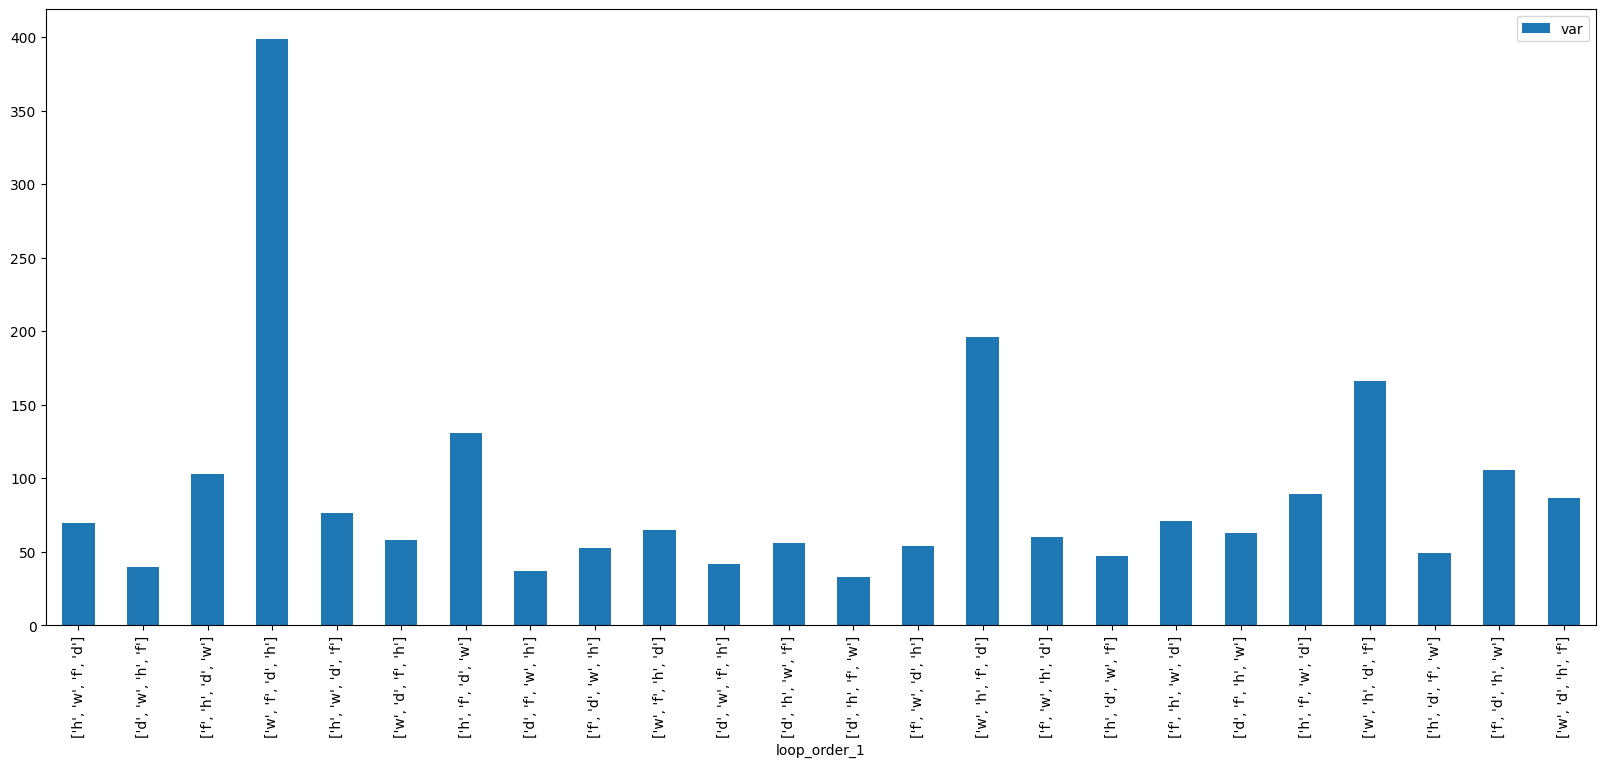

In [14]:
df_vgg1.plot.bar(x="loop_order_1",y="var",figsize = (20,8))

<AxesSubplot: xlabel='loop_order_1'>

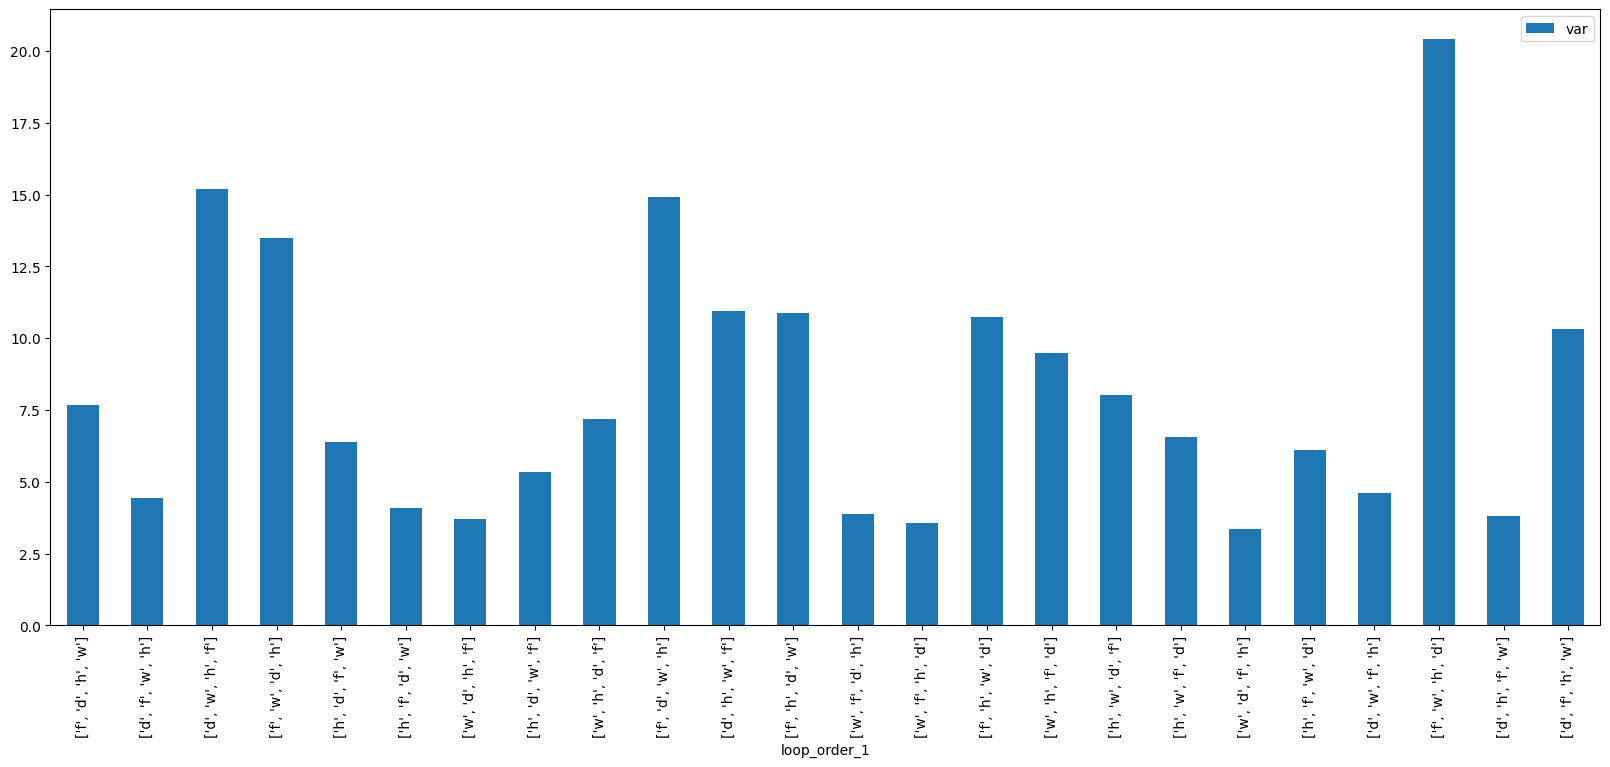

In [15]:
df_vgg2.plot.bar(x="loop_order_1",y="var",figsize = (20,8))

<AxesSubplot: xlabel='loop_order_1'>

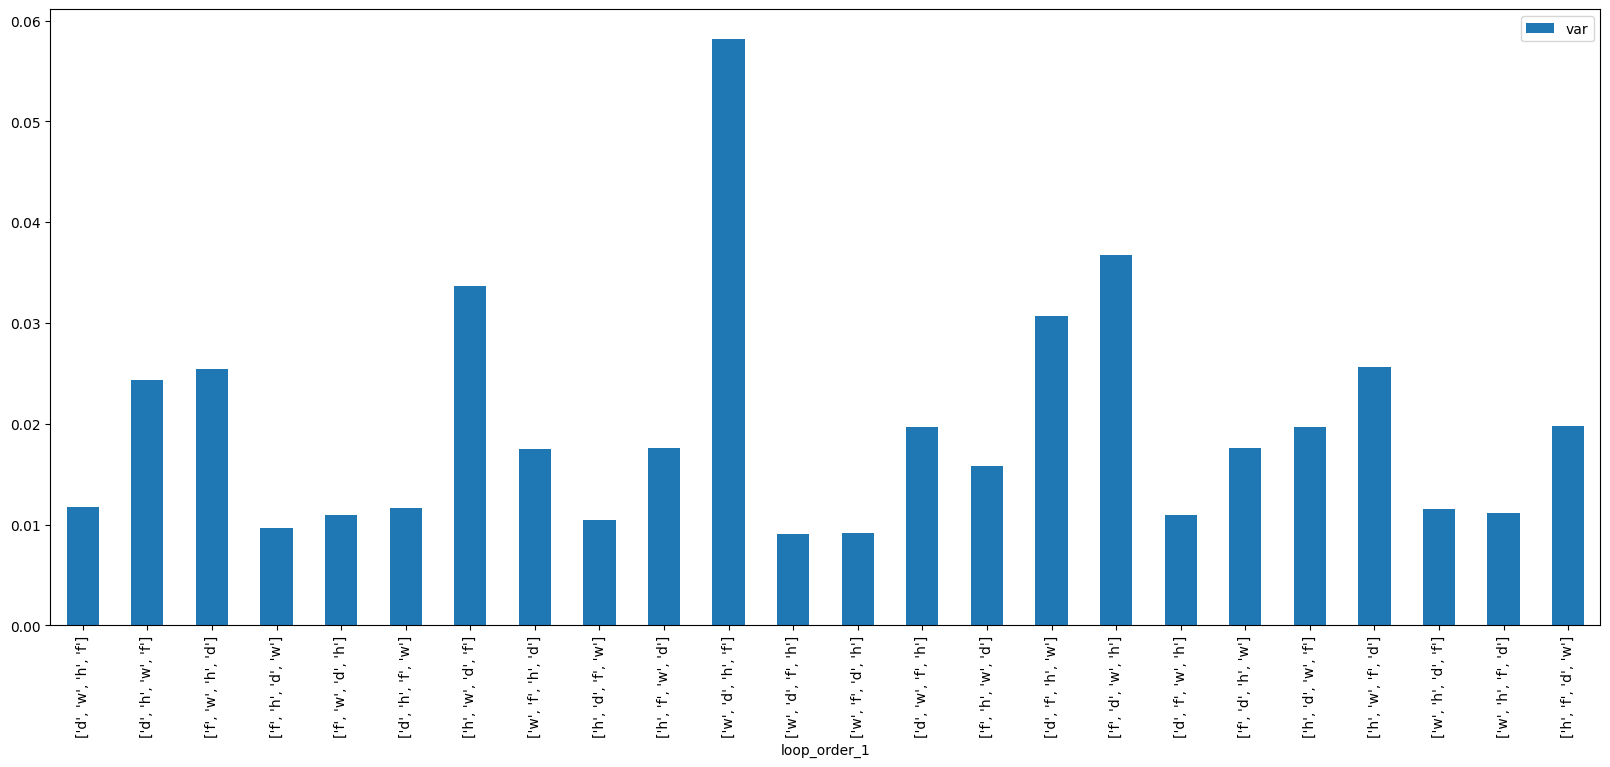

In [16]:
df_vgg3.plot.bar(x="loop_order_1",y="var",figsize = (20,8))

<AxesSubplot: xlabel='loop_order_1'>

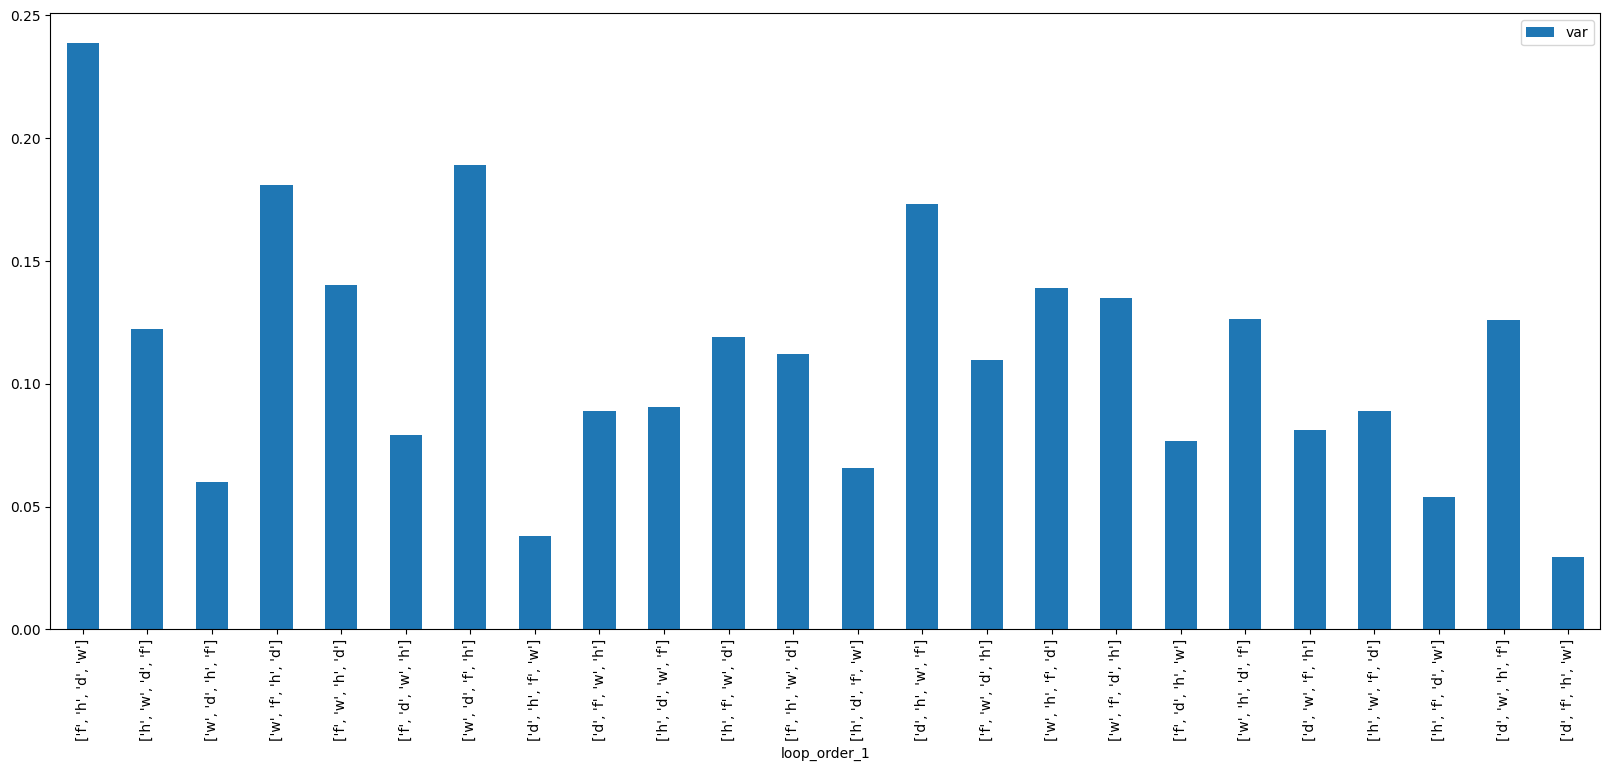

In [17]:
df_vgg4.plot.bar(x="loop_order_1",y="var",figsize = (20,8))